<a href="https://colab.research.google.com/github/enino84/enino84.github.io/blob/main/courses/intro_data_assimilation/DA_ENDJ_Step_by_Step_Initial_Ensemble_Lorenz63.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating the initial ensemble

In [ ]:
#y = [x, y, z]
def lorenz63(t, y):
  sig = 10;
  r = 28;
  b = 8/3;
  return [sig*(y[1]-y[0]),
          y[0]*(r - y[2]) - y[1],
          y[0]*y[1] - b*y[2]];

# Import `scipy` - `integrate` - `solve_ivp`

In [ ]:
import numpy as np

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
t0 = 0;
tf = 100;
t = np.arange(t0, tf, 0.05);
sol = solve_ivp(lorenz63, [t0, tf], [-20, -20, -20], t_eval=t);

In [ ]:
import matplotlib.pyplot as plt


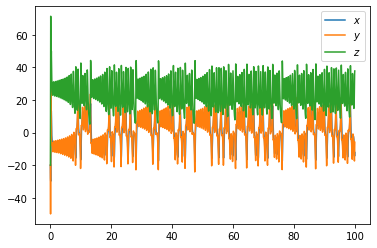

In [ ]:
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.legend(['$x$', '$y$', '$z$'])

In [ ]:
print(f'x_0 = {sol.y[0][-1]}, y_0 = {sol.y[1][-1]}, z_0 = {sol.y[2][-1]}');

x_0 = -12.229837932913707, y_0 = -5.929600353668651, z_0 = 37.80028593557974


# Atractor Lorenz 63

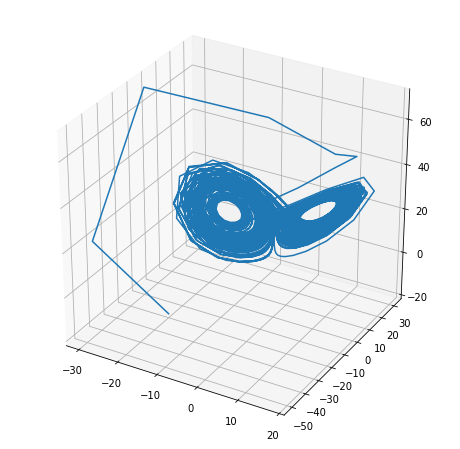

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d');
ax.plot3D(sol.y[0], sol.y[1], sol.y[2]);

# Generate an initial ensemble

In [ ]:
np.random.seed(10);

ic = np.array([sol.y[0][-1], sol.y[1][-1], sol.y[2][-1]]);

Nens = 100;

white_noise = np.random.randn(Nens,3);

e_0 = ic + white_noise; #perturbed ensemble

In [ ]:
e_0

array([[-10.89825143,  -5.21432138,  36.25488564],
       [-12.23822178,  -5.30826438,  37.08020037],
       [-11.96432635,  -5.82105183,  37.80457737],
       [-12.40443814,  -5.49657416,  39.00332331],
       [-13.1949036 ,  -4.90132628,  38.02891607],
       [-11.78470032,  -7.06620257,  37.93542281],
       [-10.74530093,  -7.00940524,  35.82255765],
       [-13.97321023,  -5.66353019,  40.18525327],
       [-11.10614668,  -4.25697814,  37.89943515],
       [-10.83184156,  -6.20084834,  38.41349012],
       [-12.49715512,  -6.47890937,  37.93299423],
       [-12.70597995,  -4.62112727,  37.99529921],
       [-11.82962794,  -6.26723269,  39.0567582 ],
       [-12.96180743,  -5.2693688 ,  37.44941404],
       [-13.16927129,  -6.41893757,  36.99569479],
       [-12.44253557,  -6.2687406 ,  38.11245587],
       [-11.66468526,  -6.07702061,  37.7743806 ],
       [-11.94074373,  -6.46947943,  38.50844596],
       [-11.38761319,  -5.72601956,  40.1949896 ],
       [-11.312379  ,  -6.04187

In [ ]:
[U,S,V] = np.linalg.svd(white_noise, full_matrices=False);

In [ ]:
import seaborn as sns

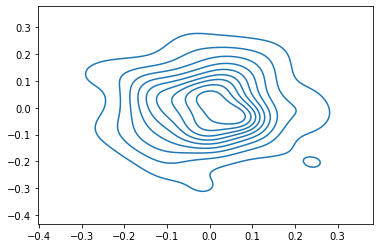

In [ ]:
sns.kdeplot(x=U[:,0], y=U[:,1]);

In [ ]:
eb = [];
t0 = 0;
tf = 50;
t = np.arange(t0, tf, 0.1);
for e in e_0:
  sol = solve_ivp(lorenz63, [t0, tf], e, t_eval=t);
  eb.append([sol.y[0][-1], sol.y[0][-1], sol.y[2][-1]]);

In [ ]:
eb = np.array(eb);

In [ ]:
[U,S,V] = np.linalg.svd(eb, full_matrices=False);

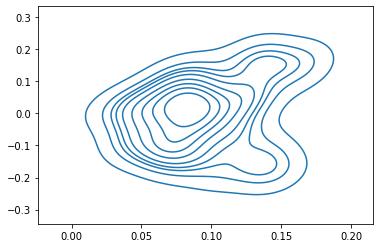

In [ ]:
sns.kdeplot(x=U[:,0], y=U[:,1])

In [ ]:
import pandas as pd

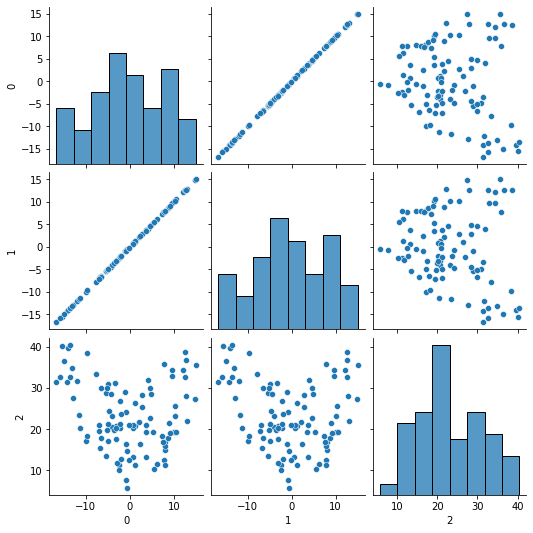

In [ ]:
sns.pairplot(pd.DataFrame(eb))

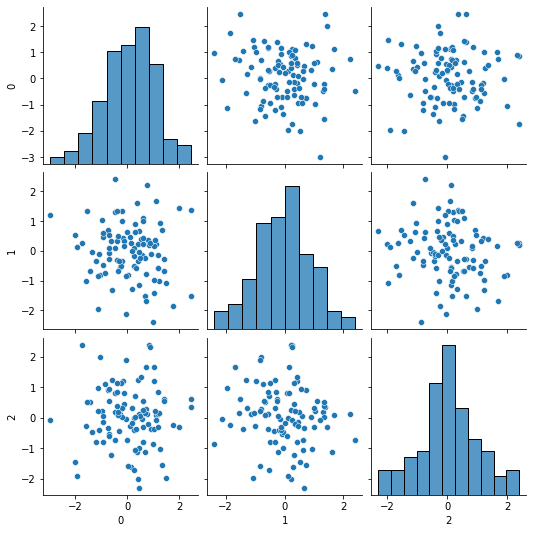

In [ ]:
sns.pairplot(pd.DataFrame(white_noise))

In [ ]:
eb

array([[-12.09656177, -12.09656177,  31.67423351],
       [  2.21008922,   2.21008922,  21.587389  ],
       [ -0.77820608,  -0.77820608,  24.19405588],
       [ -7.79761091,  -7.79761091,  33.37741257],
       [ -2.38284973,  -2.38284973,  11.24293235],
       [-15.52239242, -15.52239242,  40.13970882],
       [  0.62014259,   0.62014259,  13.30842436],
       [  4.58397298,   4.58397298,  22.70556059],
       [ -5.48029663,  -5.48029663,  28.81670918],
       [  9.69478391,   9.69478391,  32.80120998],
       [ -1.94649518,  -1.94649518,  23.58164146],
       [ 14.91146571,  14.91146571,  27.26915015],
       [ -7.00279726,  -7.00279726,  21.08054951],
       [ -0.53716639,  -0.53716639,  14.59361501],
       [-14.24103396, -14.24103396,  31.40727541],
       [ 10.09793483,  10.09793483,  19.27774176],
       [  4.04875494,   4.04875494,  31.93081772],
       [ -2.52418454,  -2.52418454,  10.16228859],
       [ -1.00101537,  -1.00101537,  28.87089742],
       [ -6.4495542 ,  -6.44955

# Creating a reference solution

In [ ]:
t0 = 0;
tf = 50;
t = np.arange(t0, tf, 0.1);
sol = solve_ivp(lorenz63, [t0, tf], ic, t_eval=t);
ref = [sol.y[0][-1], sol.y[0][-1], sol.y[2][-1]];

In [ ]:
ref

[4.809768821265639, 4.809768821265639, 13.940522628171138]

In [ ]:
ref = np.array(ref, dtype=np.float32);
eb = eb.astype(np.float32);

In [ ]:
R = (0.01**2)*np.eye(3);
H = np.eye(3);

In [ ]:
R

array([[0.0001, 0.    , 0.    ],
       [0.    , 0.0001, 0.    ],
       [0.    , 0.    , 0.0001]])

In [ ]:
eb = eb.reshape(3, Nens);
ref = ref.reshape(-1,1);

In [ ]:
ref.shape

(3, 1)

Observation $y = H x^{*} + \epsilon$, $\epsilon \sim \mathcal{N}(0, {\bf R})$

In [ ]:
y = H @ ref + np.sqrt(R) @ np.random.randn(3,1);
y = H @ ref + np.random.multivariate_normal(np.zeros(3), R).reshape(-1,1);

In [ ]:
np.random.multivariate_normal(np.zeros(3), R)

array([-0.01515076, -0.00538719,  0.00756622])

In [ ]:
y

array([[ 4.8019418 ],
       [ 4.82056598],
       [13.93589379]])

In [ ]:
ref

array([[ 4.8097687],
       [ 4.8097687],
       [13.940522 ]], dtype=float32)

# Building the synthetic data

In [ ]:
synthetic_noise = np.random.multivariate_normal(np.zeros(3), R, size=Nens).reshape(3, Nens)

In [ ]:
synthetic_noise.shape

(3, 100)

In [ ]:
Ys = y + synthetic_noise;

In [ ]:
Xb = eb;

In [ ]:
Pb = np.cov(Xb)

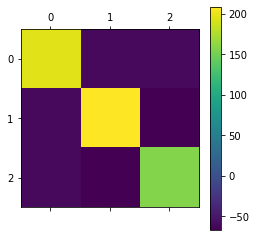

In [ ]:
plt.matshow(Pb);
plt.colorbar()

${\bf X}^a = {\bf X}^b + {\bf P}^b \, {\bf H}^T \left[{\bf R} + {\bf H}\,{\bf P}^b \, {\bf H}^T \right]^{-1} \cdot [{\bf Y}^s - {\bf H} \cdot {\bf X}^b] $

In [ ]:
D = Ys-H @ Xb;

I = R + H @ Pb @ H.T;

Xa = Xb + Pb @ H.T @ np.linalg.solve(I, D); #Evensen 2003

# Errores

In [ ]:
xb = np.mean(Xb, axis=1).reshape(-1,1)
xa = np.mean(Xa, axis=1).reshape(-1,1)

In [ ]:
eb = np.linalg.norm(ref-xb)/np.linalg.norm(ref);
ea = np.linalg.norm(ref-xa)/np.linalg.norm(ref);

print(f'error background = {100*eb}% y error analysis = {100*ea}%')

error background = 53.77836227416992% y error analysis = 0.10029277122729019%


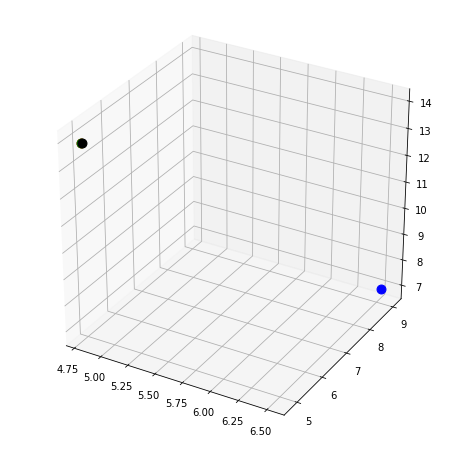

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d');
ax.scatter3D(xb[0], xb[1], xb[2], s=80, c='b');
ax.scatter3D(ref[0], ref[1], ref[2], s=80, c='k');
ax.scatter3D(y[0], y[1], y[2], s=80, c='g');
ax.scatter3D(xa[0], xa[1], xa[2], s=80, c='r');

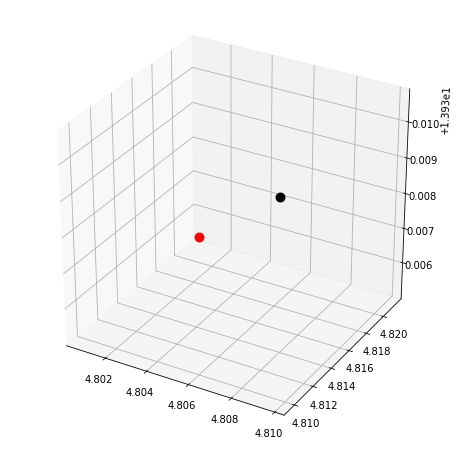

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d');
ax.scatter3D(ref[0], ref[1], ref[2], s=80, c='k');
ax.scatter3D(xa[0], xa[1], xa[2], s=80, c='r');

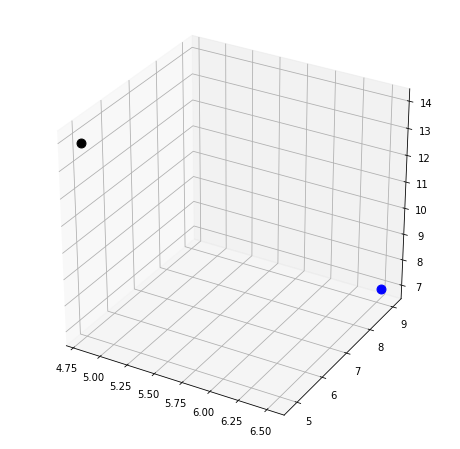

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d');
ax.scatter3D(xb[0], xb[1], xb[2], s=80, c='b');
ax.scatter3D(ref[0], ref[1], ref[2], s=80, c='k');